#Introducción
En los problemas de clasificación se necesitan 2 elementos esenciales: la clase y la situación en la que se da la clase. Para encontrar la clase se debe asumir que los datos recabados de la situación son la causa de la misma.

\begin{align}
f(datos)=clase
\end{align}

También se puede suponer que la aparición de los datos no afecta de ninguna forma la clase que se observa, lo cual aplica en algunos casos, por ejemplo, cuando se lanza una moneda. En otros casos es posible que sea mejor suponer que el orden si afecta, por ejemplo, en las palabras de una oración.

\begin{align}
f(datos,orden)=clase
\end{align}

Estos datos en los que se supone que el orden importa, se les llama datos secuenciales. Por otro lado existen otro tipo de datos en los que importa también la huella del tiempo, es decir en que momento se obtuvieron dichos datos. 

\begin{align}
f(datos,orden,tiempo)=clase
\end{align}

A estos datos se les llama datos secuenciales temporales, algunos ejemplos de estos pueden ser: el comportamiento de los clientes de un centro comercial, la secuencia de reacciones quimicas en un proceso, etc.

En la vida cotidiana se pueden encontrar muchos ejemplos de datos secuenciales. Por ejemplo, el ADN que conforma nuestro código genético, las palabras que componen una oración, los productos comprados en un supermercado en un día.
![picture](https://drive.google.com/uc?id=1Lu3Tm4UtM5_seythlsCwcs0gnwSKXozl)


# Definiciones previas
Una vez definido lo que son los datos secuenciales, es conveniente denifir los siguientes conceptos.

## Muestra
Una muestra son datos del entorno de nuestro problema, puede estar etiquetada o no. En este caso se considerarán unicamente datos etiquetados. 

\begin{align}
(datos,clase)
\end{align}

## Corpus
Un corpus es un conjunto de muestras del problema que tenemos. Estas pueden tener muchas características, pero lo ideal es que tenga las mismas características que las muestras del entorno, es decir, que si un evento sucede menos veces en la realidad, debe aparecer menos veces en el corpus. De esto se desprenden dos tipos de corpus, balanceados y no balanceados. 

![picture](https://drive.google.com/uc?id=1HimKWxV8_Mypg0Pukqgtaqm-tOn9LY8A)

## Pipeline en IA
Frecuentemente cuando se diseñan soluciones de inteligencia artificial se toma en cuenta que se solucione el problema, pero se pierde de vista cual es el objetivo de obtener dicha solución. Por eso antes de hacer una sola linea de codigo o de pensar en que modelo se usará, se debe proponer y aprobar un proceso iterativo del desarrollo de la solución, un pipeline. Para estos fines tendremos el siguiente pipeline.

# Datos secuenciales
En este taller se puede usar el siguiente corpus [corpus original](http://ivanvladimir.github.io/sitio-corpus-ironia/)  el cual consiste en muestras irónicas y no irónicas  etiquetadas de twitter. Por fines didacticos, se proporciona el corpus ya digerido, es decir, con los datos ya extraidos.  [corpus digerido](https://drive.google.com/open?id=1l_TBmLX5l-aKW0lZFUv6YzH4cWlxawb0) . La obtención de este corpus fue el trabajo de tesis de la Ingeniera Gabriela Jasso y después fue etiquetado manualmente por un equipo de 5 etiquetadores. El siguiente código es el que transforma a los textos de los twits en vectores que después pueden ser leídos por un clasificador.

Primero debe establecerse una conexión con nuestro almacenamiento de datos, en este caso usaremos Drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive')
base="/content/drive/My Drive/Colab Notebooks/Curso/"
!pip install tensorflow==1.12.0
import tensorflow as tf
print(tf.__version__)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 83.1MB 324kB/s 
     |████████████████████████████████| 3.1MB 40.7MB/s 
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0
1.12.0


Para tener una buena práctica en cuanto a evaluación, se va a particionar el corpus usando, KFolds. Por lo que obtendremos 5 corpus con distribuciones distintas. Para ser prácticos se usará el primer corpus.

In [0]:
import random
from sklearn.model_selection import KFold
def obtenerCorpuses(nombreArchivo, nombresBase):
    """Con esta función se crea 5 archivos con las  secciones del corpus
    INPUT:el nombre del corpus completo sin seccionar
    OUTPUT:si el proceso fue exitoso regresa los nombres de los archivos sino 0"""
    try:
        corpus = open(nombreArchivo, "r").readlines()
        random.shuffle(corpus, random.random)
        X = [x.split("|", 2)[2] for x in corpus]
        y = [y.split("|", 2)[1] for y in corpus]
        print('El total del corpus es: ', len(X), ' twits')
        skf = KFold(n_splits=5)
        i = 0
        nombres = []
        for train, test in skf.split(X, y):
            # print("%s %s" % (train, test))
            f = open(nombresBase[0]+str(i)+".txt", "w")
            for idx in train:
                f.write(y[idx]+"|"+X[idx])
            f.close()
            f = open(nombresBase[1]+str(i)+".txt", "w")
            for idx in test:
                f.write(y[idx]+"|"+X[idx])
            nombres.append([nombresBase[0]+str(i)+".txt",
                            nombresBase[1]+str(i)+".txt"])
            i += 1
            f.close()

        return nombres
    except Exception as e:
        print("Ha ocurrido un problema: ", e)
        return 0

corpus = base+"corpus_complete_alan.txt"
baseDatos =base+ "Data/"
!mkdir {baseDatos.replace(" ","\ ")}
obtenerCorpuses(corpus, [baseDatos+"corpusTrain", baseDatos+"corpusTest"])


mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/Curso/Data/’: File exists
El total del corpus es:  76530  twits


[['/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTrain0.txt',
  '/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTest0.txt'],
 ['/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTrain1.txt',
  '/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTest1.txt'],
 ['/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTrain2.txt',
  '/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTest2.txt'],
 ['/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTrain3.txt',
  '/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTest3.txt'],
 ['/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTrain4.txt',
  '/content/drive/My Drive/Colab Notebooks/Curso/Data/corpusTest4.txt']]

Una vez que tenemos este corpus, se le aplicará un preprocesamiento, en este caso se usará un procesamiento por n-gramas de 2, esta parte es muy importante y pueden usarse, como se sabe, diferentes procesos, como la extracción de etiquetas POS, o usar el n-gramas por palabra, se usa este por practicidad y ya que se sabe que llega a buenos resultados.

In [0]:
import numpy as np
import json
from tensorflow.keras.preprocessing import sequence
def preprocessing(corpus,getVocabulary,n,lenPad,vocabulary={}):
    twitsVectors=[]
    twitLabels=[]
    cosas=[("\\n","\n"),("http://link","η"),("\\\"","\"")]
    vocabularioBueno={"NTG":0,"UNK":1}
    with open(corpus,"r") as f:
        for line in f:
            twit=line.split("|",1)
            for c,v in cosas:
                twit[1]=twit[1].replace(c,v)
            # tnGrams=t[1]
            original=twit[1]
            vector=[] 
            twit[1]="ŧ"+twit[1]+"¶"
            twit[1]=twit[1][::-1]
            for i in range(len(twit[1])-(n-1)):
                tnGrams=twit[1][i:i+n]
                if getVocabulary:
                    if tnGrams not in vocabularioBueno.keys():
                        vocabularioBueno[tnGrams]=len(vocabularioBueno.keys())##Aqui va lo de los vectores
                    vector.append(vocabularioBueno[tnGrams])
                else:
                    if tnGrams not in vocabulary:
                        vector.append(vocabulary["UNK"])
                    else:
                        vector.append(vocabulary[tnGrams])    
            if(len(vector)==0):
                print(vector)
                print(original)
                input(twit[0])
            twitsVectors.append(vector)
            twitLabels.append(int(twit[0]))
    
    if getVocabulary:
        y=np.array(twitLabels).astype('int32')
        
        return sequence.pad_sequences(twitsVectors, maxlen=lenPad),y,vocabularioBueno
    else:
        y=np.array(twitLabels[:-2]).astype('int32')
        
        return sequence.pad_sequences(twitsVectors[:-2], maxlen=lenPad),y

baseVect=base+"Vectors/"
baseVocabs=base+"Vocabs/"
!mkdir {baseVect.replace(" ","\ ")}
!mkdir {baseVocabs.replace(" ","\ ")}
maxlen=200
x_train,y_train,vocab=preprocessing(baseDatos+"corpusTrain0.txt",True,1,maxlen)
np.savez(baseVect+"vectorsLabelsTrain.npz",vectors=x_train,labels=y_train)
with open(baseVocabs+"vocabulario.json","w") as fw:
    fw.write(json.dumps(vocab))
x_test,y_test=preprocessing(baseDatos+"corpusTest0.txt",False,1,maxlen,vocab)
np.savez(baseVect+"vectorsLabelsTest.npz",vectors=x_test,labels=y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/Curso/Vectors/’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/Curso/Vocabs/’: File exists
(61224, 200)
(61224,)
(15304, 200)
(15304,)


# ¿Como se desempeña una MLP?
Las redes neuronales completamente conectadas o MLP(Multi Layer Perceptron), trabajan bajo la suposición de que el orden de los elementos que componen los datos, no es relevante, procesa los datos de manera no secuencial, sin incluir la dimensión del orden en su procesamiento. Para ejemplificar rápidamente, se realizará este procesamiento, el cual obtiene apenas un f-score promedio de 0.04. Además es una oportunidad perfecta para probar el pipeline y su independencia entre modulos.

In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense, Dropout

def make_modelMLP(batch_size=None):
    source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.float32, name='Input')
    layer1 = Dense(100, activation='sigmoid', name='layer1')(source)
    
    layer2 = Dense(100, activation='sigmoid', name='layer2')(layer1)
    dropout3=Dropout(0.5,name="Dropout3")(layer2)
    predicted_var = Dense(1, activation='sigmoid', name='Output')(dropout3)
    model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
    model.compile(
            optimizer= tf.train.AdamOptimizer(),
            loss='binary_crossentropy',
            metrics=['acc'])
    model_json = model.to_json()
    with open(base+"/Modelo.json","w") as json_file:
      json_file.write(model_json)
    return model

Después se incluirá el modulo de entrenamiento que se encargará de entrenar cualquier modelo que se pase, en este primer caso se pasará una MLP de 3 capas con dropdown de 0.5. Se usan TPU para acelerar el procesamiento en gran medida y probar la efectividad de la red. El tamaño de batch se establece en 512, sin embargo puede variar dependiendo de como se este adaptando, esto debido que se usa una técnica de mini-batch gradient descent que acelera el desempeño del entrenamiento, sacrificando seguridad en el gradiente.
https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1
(Notas)(Revisar exactamente que usa fit por default)

In [0]:
import os
import time

def trainModel(training_model,x_train,y_train,x_test,y_test,weights,epochs, bach_size):
  TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  tf.logging.set_verbosity(tf.logging.INFO)
  # this line is to don't print warnings and info that tf use by default
  os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
  tf.logging.set_verbosity(tf.logging.ERROR)
  
  tpu_model = tf.contrib.tpu.keras_to_tpu_model(
      training_model,
      strategy=tf.contrib.tpu.TPUDistributionStrategy(
          tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

  tpu_model.summary()

  start_time = time.time()

  history = tpu_model.fit(x_train, y_train,
                      epochs=epochs,
                      batch_size=bach_size * 8,
                      validation_data=[x_test,y_test])
  tpu_model.save_weights('./tpu_model.h5', overwrite=True)
  !cp ./tpu_model.h5 {weights.replace(" ","\ ")}
  print("--- %s seconds ---" % (time.time() - start_time))
  return tpu_model

Después de esta parte, se deberá establecer un módulo de evaluación que será independiente de que modelo se esta generando. Este nos dira el accuracy, precision, recall y f-score, además de curvas ROC y AUC, para describir su comportamiento. 

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_curve,auc
import numpy as np
import matplotlib.pyplot as plt
import IPython
IPython_default = plt.rcParams.copy()
# # use a gray background
    
# # control face and edge color of histogram
# ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

def evaluate(x_test,y_test,inferencing_model):
  
  inferencing_model.load_weights('./tpu_model.h5')
  
  y_pred=inferencing_model.predict(x_test,verbose=1,batch_size=32)
  fpr, tpr, thresholds = roc_curve(y_test.astype(float),y_pred )
  y_pred=np.array([int(i) for i in map(np.rint,y_pred)])

  y_test=np.array([int(i) for i in map(np.rint,y_test)])

  print("accuracy ",accuracy_score(y_test,y_pred))
  print("Matriz de confusión ",confusion_matrix(y_test,y_pred))
  print("Recall ",recall_score(y_test,y_pred,average='binary'))
  print("Precision ",precision_score(y_test,y_pred,average='binary'))
  print("F1-score ",f1_score(y_test,y_pred,average='binary'))
  roc_auc=auc(fpr,tpr)
  plt.figure( figsize=(8, 6))
  ax = plt.axes(facecolor='#E6E6E6')
  ax.set_axisbelow(True)

  # draw solid white grid lines
  plt.grid(color='w', linestyle='solid')

  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate',fontsize="14")
  plt.ylabel('True Positive Rate',fontsize="14")
  plt.legend(loc="lower right",fontsize='12')
  plt.show()
  return fpr,tpr

Después se genera un pequeño código que generará el modelo, lo entrenará y evaluará. Se propone salvar los pesos, para que en caso de que sean necesarios obtenerlos y tener unas versiones de los modelos, se puedan mantener en el almacenamiento.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (200000, 200)             0         
_________________________________________________________________
layer1 (Dense)               (200000, 100)             20100     
_________________________________________________________________
layer2 (Dense)               (200000, 100)             10100     
_________________________________________________________________
Dropout3 (Dropout)           (200000, 100)             0         
_________________________________________________________________
Output (Dense)               (200000, 1)               101       
Total params: 30,301
Trainable params: 30,301
Non-trainable params: 0
_________________________________________________________________
Train on 61224 samples, validate on 15304 samples
Epoch 1/2
61224/61224 [==============================] - 64s 1ms/step - loss: 0.3551 - a

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


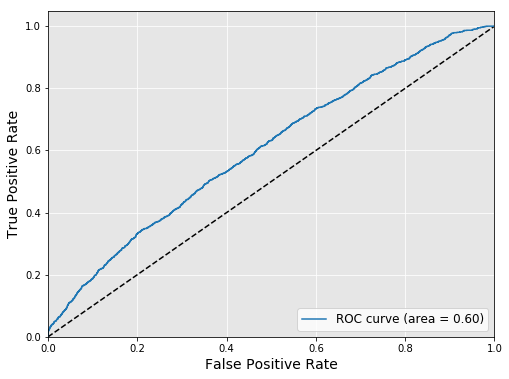

In [0]:
max_features=200000
weights=base+"pesosModeloMLP.hd5"
model=make_modelMLP(max_features)
tpu_model=trainModel(model,x_train,y_train,x_test,y_test,weights,2,64)
fpr,tpr=evaluate(x_test,y_test,model)

El desempeño de la red MLP, como se pudo esperar de solo 2 epoch no fue el mejor, ya que tiene apenas un f-score de 0.4, y aunque tiene una precision de 1 el recall apenas alcanza el 0.024 lo cual quiere decir que el sistema apenas supo distinguir que el corpus no es balanceado y que es mejor decir siempre que las muestras no son irónicas. La curva ROC y el AUC se acercan mucho al comportamiento aleatorio, y son apenas mejor. Esta prueba y lo anterior dicho, nos dice que una MLP, no es la respuesta más adecuada para este tipo de problemas.

# Redes Neuronales Recurrentes (RNN)
Las redes neuronales recurrentes nacen en ... 
Con el fin de atajar el problema de los analisis de datos secuenciales, su arquitectura es la siguiente 
(NOTA) (Completar con imagenes y descripción del modelo.)

El código en Keras que describe este modelo es el siguiente:

In [0]:
from tensorflow.python.keras.layers import SimpleRNN,Embedding
max_features=200000# numero de palabras que se pueden considerar caracteristicas
def make_modelRNN(batch_size=None):
    source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.float32, name='Input')
    embedding = Embedding(input_dim=max_features, output_dim=128, name='Embedding')(source)
    rnn=SimpleRNN(200)(embedding)
    dropout=Dropout(0.5,name="Dropout")(rnn)
    predicted_var = Dense(1, activation='sigmoid', name='Output')(dropout)
    model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
    model.compile(
            optimizer=  tf.train.RMSPropOptimizer(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['acc'])
    model_json = model.to_json()
    with open(base+"/Modelo.json","w") as json_file:
      json_file.write(model_json)
    return model

Como se puede ver se necesita una capa de embedding que generé el significado de los tokens que se les pasara como elementos del vector de características, y después pasará a la capa RNN con 200 unidades de Simple RNN, luego a una MLP que distinguirá la información procesada por la RNN y decidirá si es una muestra positiva o negativa (irónica o no irónica)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 200)               0         
_________________________________________________________________
Embedding (Embedding)        (None, 200, 128)          25600000  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 200)               65800     
_________________________________________________________________
Dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 201       
Total params: 25,666,001
Trainable params: 25,666,001
Non-trainable params: 0
_________________________________________________________________
Train on 61224 samples, validate on 15304 samples
Epoch 1/10
61224/61224 [==============================] - 123s 2ms/step - loss: 

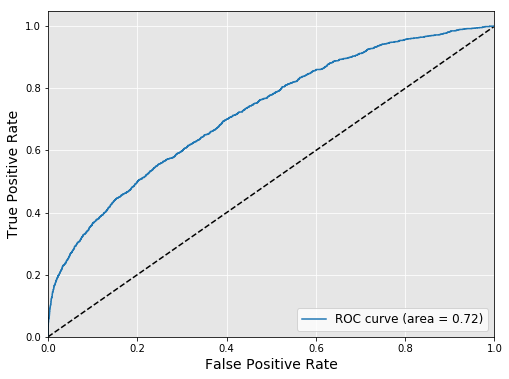

In [0]:
weights=base+"pesosModeloRNN.hd5"
model=make_modelRNN()
tpu_model=trainModel(model,x_train,y_train,x_test,y_test,weights,10,32)
fpr,tpr=evaluate(x_test,y_test,model)

El desempeño de la RNN mejorá considerablemente con respecto a la MLP, sin embargo aun le falta mucho para alcanzar un desempeño aceptable, se puede ver un f-score de 0.16 y un precision de 0.61 lo cual indica que el modelo, toma más veces la decisión de no decir que es negativa la muestra y se 'arriesga' a decir que la muestra es positiva, por otro lado el recall es de apenas 0.09 lo cual indica que el modelo cuando se arriesga suele fallar el 90.1% de las veces.

# LSTM &GRU
Las redes LSTM y GRU fueron ideadas por ..
Con el fin de obtener ...
Su arquitectura es la siguiente ...
(NOTA) Realizar una investigación y referencia de estos tre puntos

La generación de código en keras que genera un modelo LSTM es el siguiente

In [0]:
from tensorflow.python.keras.layers import LSTM
def make_modelLSTM(max_features,batch_size=None):
  tf.keras.backend.clear_session()
  source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.int32, name='Input')
  embedding = Embedding(input_dim=max_features, output_dim=128, name='Embedding')(source)
  lstm = LSTM(200, name = 'LSTM')(embedding)
  dropout=Dropout(0.5,name="Dropout")(lstm)
  predicted_var = Dense(1, activation='sigmoid', name='Output')(dropout)
  model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
  model.compile(
          optimizer= tf.train.RMSPropOptimizer(learning_rate=0.001),
          loss='binary_crossentropy',
          metrics=['acc'])
  model_json = model.to_json()
  with open(base+"/Modelo.json","w") as json_file:
    json_file.write(model_json)
  return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 200)               0         
_________________________________________________________________
Embedding (Embedding)        (None, 200, 128)          25600000  
_________________________________________________________________
LSTM (LSTM)                  (None, 200)               263200    
_________________________________________________________________
Dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 201       
Total params: 25,863,401
Trainable params: 25,863,401
Non-trainable params: 0
_________________________________________________________________
Train on 61224 samples, validate on 15304 samples
Epoch 1/7
61224/61224 [==============================] - 130s 2ms/step - loss: 0

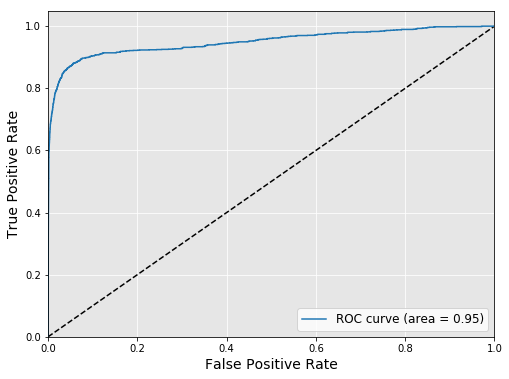

In [0]:
weights=base+"pesosModeloLSTM.hd5"
model=make_modelLSTM(max_features)
tpu_model=trainModel(model,x_train,y_train,x_test,y_test,weights,7,32)
fpr,tpr=evaluate(x_test,y_test,model)

In [0]:
from tensorflow.python.keras.layers import GRU, Bidirectional
def make_modelGRU(max_features,batch_size=None):
  tf.keras.backend.clear_session()
  source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.int32, name='Input')
  embedding = Embedding(input_dim=max_features, output_dim=128, name='Embedding')(source)
  gru = GRU(200, name = 'LSTM')(embedding)
  dropout=Dropout(0.5,name="Dropout")(gru)
  predicted_var = Dense(1, activation='sigmoid', name='Output')(dropout)
  model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
  model.compile(
          optimizer= tf.train.RMSPropOptimizer(learning_rate=0.001),
          loss='binary_crossentropy',
          metrics=['acc'])
  model_json = model.to_json()
  with open(base+"/Modelo.json","w") as json_file:
    json_file.write(model_json)
  return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 200)               0         
_________________________________________________________________
Embedding (Embedding)        (None, 200, 128)          25600000  
_________________________________________________________________
LSTM (GRU)                   (None, 200)               197400    
_________________________________________________________________
Dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 201       
Total params: 25,797,601
Trainable params: 25,797,601
Non-trainable params: 0
_________________________________________________________________
Train on 61224 samples, validate on 15304 samples
Epoch 1/7
61224/61224 [==============================] - 124s 2ms/step - loss: 0

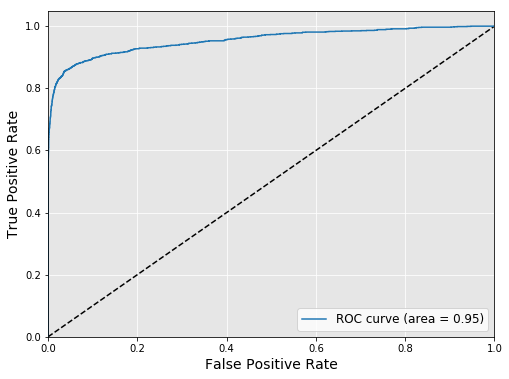

In [0]:
weights=base+"pesosModeloGRU.hd5"
model=make_modelGRU(max_features)
tpu_model=trainModel(model,x_train,y_train,x_test,y_test,weights,7,32)
fpr,tpr=evaluate(x_test,y_test,model)

#BRNN


In [0]:
from tensorflow.python.keras.layers import  Bidirectional
def make_modelBiRNN(max_features,batch_size=None):
  tf.keras.backend.clear_session()
  source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.int32, name='Input')
  embedding = Embedding(input_dim=max_features, output_dim=128, name='Embedding')(source)
  birnn = Bidirectional(SimpleRNN(200, name = 'RNN'), name='Bidirectional')(embedding)
  dropout=Dropout(0.5,name="Dropout")(birnn)
  predicted_var = Dense(1, activation='sigmoid', name='Output')(dropout)
  model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
  model.compile(
          optimizer= tf.train.RMSPropOptimizer(learning_rate=0.001),
          loss='binary_crossentropy',
          metrics=['acc'])
  model_json = model.to_json()
  with open(base+"/Modelo.json","w") as json_file:
    json_file.write(model_json)
  return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 200)               0         
_________________________________________________________________
Embedding (Embedding)        (None, 200, 128)          25600000  
_________________________________________________________________
Bidirectional (Bidirectional (None, 400)               131600    
_________________________________________________________________
Dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 401       
Total params: 25,732,001
Trainable params: 25,732,001
Non-trainable params: 0
_________________________________________________________________
Train on 61224 samples, validate on 15304 samples
Epoch 1/7
61224/61224 [==============================] - 122s 2ms/step - loss: 0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


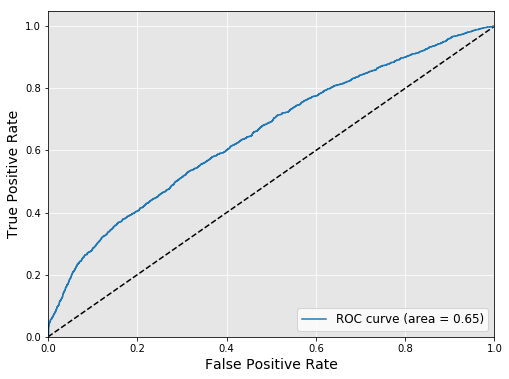

In [0]:
weights=base+"pesosModeloBiRNN.hd5"
model=make_modelBiRNN(max_features)
tpu_model=trainModel(model,x_train,y_train,x_test,y_test,weights,7,32)
fpr,tpr=evaluate(x_test,y_test,model)

# Bi LSTM
Las redes LSTM y GRU fueron ideadas por .. Con el fin de obtener ... Su arquitectura es la siguiente ... (NOTA) Realizar una investigación y referencia de estos tre puntos

La generación de código en keras que genera un modelo Bi-LSTM es el siguiente

In [0]:

def make_modelBiLSTM(max_features,batch_size=None):
  tf.keras.backend.clear_session()
  source = Input(shape=(maxlen,), batch_size=batch_size, dtype=tf.int32, name='Input')
  embedding = Embedding(input_dim=max_features, output_dim=128, name='Embedding')(source)
  lstm = Bidirectional(LSTM(200, name = 'LSTM'), name='Bidirectional')(embedding)
  dropout=Dropout(0.5,name="Dropout")(lstm)
  predicted_var = Dense(1, activation='sigmoid', name='Output')(dropout)
  model = tf.keras.Model(inputs=[source], outputs=[predicted_var])
  model.compile(
          optimizer= tf.train.RMSPropOptimizer(learning_rate=0.001),
          loss='binary_crossentropy',
          metrics=['acc'])
  model_json = model.to_json()
  with open(base+"/Modelo.json","w") as json_file:
    json_file.write(model_json)
  return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 200)               0         
_________________________________________________________________
Embedding (Embedding)        (None, 200, 128)          25600000  
_________________________________________________________________
Bidirectional (Bidirectional (None, 400)               526400    
_________________________________________________________________
Dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
Output (Dense)               (None, 1)                 401       
Total params: 26,126,801
Trainable params: 26,126,801
Non-trainable params: 0
_________________________________________________________________
Train on 61224 samples, validate on 15304 samples
Epoch 1/7
61224/61224 [==============================] - 146s 2ms/step - loss: 0

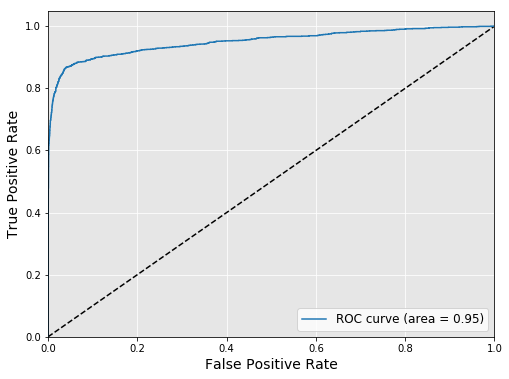

In [0]:
weights=base+"pesosModeloBiLSTM.hd5"
model=make_modelBiLSTM(max_features)
tpu_model=trainModel(model,x_train,y_train,x_test,y_test,weights,7,32)
fpr,tpr=evaluate(x_test,y_test,model)

Su desempeño es muy superior al que se tiene previamente en los otros experimentos, se puede ver una mejora significativa en f-score y recall que denotan que el modelo está entendiendo realmente el problema y no simplemente esta diciendo que todas las muestras son negativas